In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA


In [48]:
df = pd.read_csv("lab2/NO_missing_values_1498_6.csv", sep = ',')

In [50]:

def outliers_function(data, column, factor):
    col = pd.to_numeric(data[column]).astype(float)

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lower_15 = Q1 - 1.5 * IQR
    upper_15 = Q3 + 1.5 * IQR
    lower_3 = Q1 - 3 * IQR
    upper_3 = Q3 + 3 * IQR

    if factor == 3:  # ekstremalios isskirtys
        out = col[(col < lower_3) | (col > upper_3)]
    elif factor == 1.5:  # salygines isskirtys
        out = col[((col < lower_15) & (col >= lower_3)) |
                  ((col > upper_15) & (col <= upper_3))]
    else:
        out = pd.Series(dtype=float)
    return out.index


feature_columns = [c for c in df.columns if c != 'label']

conditional_outliers = set()
extreme_outliers = set()

for col in feature_columns:
    cond_idx = outliers_function(df, col, 1.5)
    extr_idx = outliers_function(df, col, 3)
    conditional_outliers.update(cond_idx)
    extreme_outliers.update(extr_idx)


df['outlier'] = df['label']

# salygines
df.loc[df.index.isin(conditional_outliers), 'outlier'] = 3

# ekstremalios
df.loc[df.index.isin(extreme_outliers), 'outlier'] = 4


X = df.drop(columns=['label', 'outlier']).values
y_class = df['label'].values
y_group = df['outlier'].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



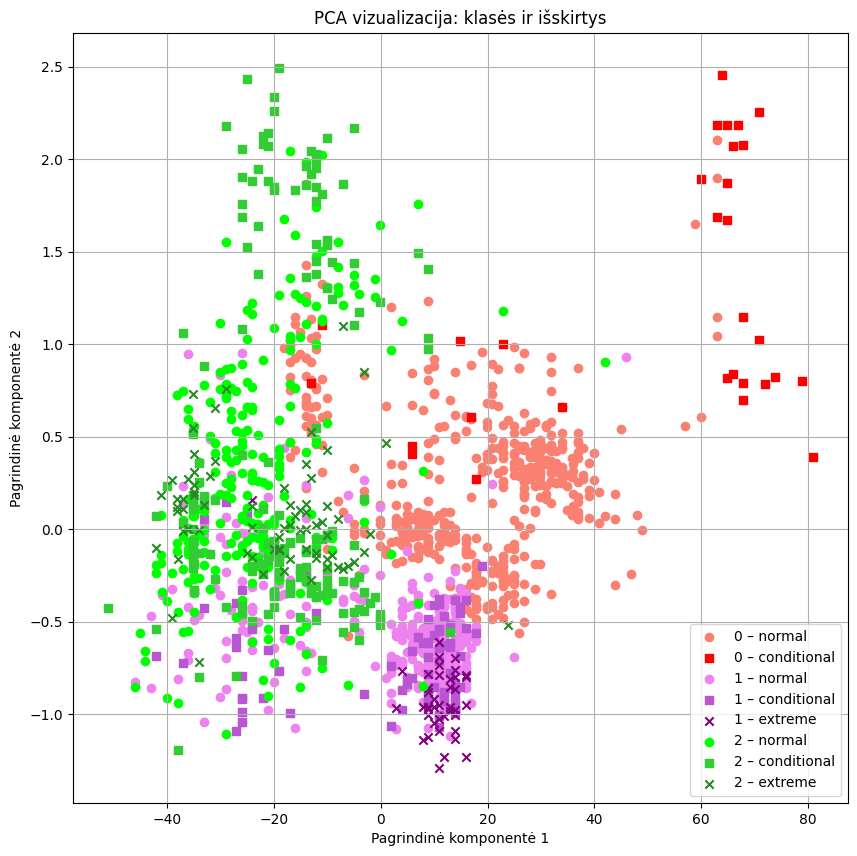

In [54]:

color_map = {
    (0, 'normal'): 'salmon',
    (0, 'conditional'): 'red',
    (0, 'extreme'): 'darkred',
    (1, 'normal'): 'violet',
    (1, 'conditional'): 'mediumorchid',
    (1, 'extreme'): 'purple',
    (2, 'normal'): 'lime',
    (2, 'conditional'): 'limegreen',
    (2, 'extreme'): 'forestgreen'
}

markers = {'normal': 'o', 'conditional': 's', 'extreme': 'x'}

plt.figure(figsize=(10, 10))

for i in range(3):  # klasės
    for group_name, group_value in zip(['normal', 'conditional', 'extreme'], [i, 3, 4]):
        mask = (y_class == i) & (y_group == group_value)
        if np.any(mask):
            plt.scatter(
                X_pca[mask, 0],
                X_pca[mask, 1],
                color=color_map[(i, group_name)],
                marker=markers[group_name],
                label=f"{i} – {group_name}"
            )
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)

plt.title("PCA vizualizacija: klasės ir išskirtys")
plt.xlabel("Pagrindinė komponentė 1")
plt.ylabel("Pagrindinė komponentė 2")
plt.grid(True)
plt.show()

In [60]:
print(pca.explained_variance_ratio_.round(3))

[0.998 0.001]
